In [33]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import datetime

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [35]:
df = pd.read_csv('kc_house_data_train.csv')
df.rename(columns = {'Unnamed: 0': 'index'}, inplace = True)
df.set_index('index', inplace = True)

def new_string(number):
    
    new_string = df.date[number].replace("T000000",'')
    
    new_string =  new_string[:4] + "-" + new_string[4:]
    
    new_string =  new_string[:7] + "-" + new_string[7:]
    
    return new_string

def into_time(string):
    return datetime.datetime.strptime(string, "%Y-%m-%d")

df['sold_time'] = [into_time(i) for i in [new_string(i) for i in range(len(df))]]
df['years_ago_sold'] = abs(pd.DatetimeIndex(df['sold_time']).year - 2021)

df = df.drop(['sold_time','date', 'id','zipcode'], axis = 1)

In [26]:
target = df.price
df_features = df.drop(['price'], axis = 1)

In [27]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,years_ago_sold,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms years_ago_sold,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms years_ago_sold,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living years_ago_sold,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot years_ago_sold,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors years_ago_sold,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,waterfront years_ago_sold,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view lat,view long,view sqft_living15,view sqft_lot15,view years_ago_sold,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition lat,condition long,condition sqft_living15,condition sqft_lot15,condition years_ago_sold,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade lat,grade long,grade sqft_living15,grade sqft_lot15,grade years_ago_sold,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above years_ago_sold,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement years_ago_sold,yr_built^2,yr_built yr_renovated,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_built years_ago_sold,yr_renovated^2,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,yr_renovated years_ago_sold,lat^2,lat long,lat sqft_living15,lat sqft_lot15,lat years_ago_sold,long^2,long sqft_living15,long sqft_lot15,long years_ago_sold,sqft_living15^2,sqft_living15 sqft_lot15,sqft_living15 years_ago_sold,sqft_lot15^2,sqft_lot15 years_ago_sold,years_ago_sold^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,47.4388,-122.162,2390.0,7700.0,7.0,16.0,9.0,8280.0,35572.0,8.0,0.0,0.0,16.0,32.0,8280.0,0.0,7944.0,0.0,189.7552,-488.648,9560.0,30800.0,28.0,5.0625,4657.5,20009.25,4.5,0.0,0.0,9.0,18.0,4657.5,0.0,4468.5,0.0,106.73730,-274.8645,5377.5,17325.0,15.75,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,4284900.0,0.0,4111020.0,0.0,98198.316,-252875.34,4947300.0,15939000.0,14490.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,18408510.0,0.0,17661498.0,0.0,421873.2484,-1086386.666,21254270.0,68476100.0,62251.0,4.0,0.0,0.0,8.0,16.0,4140.0,0.0,3972.0,0.0,94.8776,-244.324,4780.0

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

In [29]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [30]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 157869.12599024267


In [31]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 161929.71725085797
Training:  157869 vs. Testing:  161929


/Users/jonathansilverman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

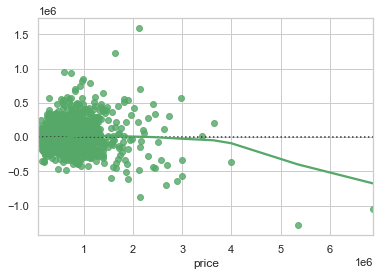

In [32]:
sns.residplot( y_test, y_test_pred,lowess=True, color="g")